In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os

sys.path.append(os.path.dirname(os.getcwd()))
from lib.velocity import simmel_velocity
from lib.metrics import plot_errors
from lib.sympy_helper import get_function_from_output

In [5]:
ref_func = get_function_from_output("msre-ref-4")
corr_func = get_function_from_output("max-corr-5")

min_ref_func = get_function_from_output("msre-ref-4", max_complexity=68)
min_corr_func = get_function_from_output("max-corr-5", max_complexity=100)

c:\Users\Trevor Semeraro\Documents\GitHub\nasa-internship\terminal-velocity\lib\metrics.py:119: UserWarning: Adding colorbar to a different Figure <Figure size 1800x600 with 4 Axes> than <Figure size 1800x600 with 3 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(abs_im, cax=cax)
c:\Users\Trevor Semeraro\Documents\GitHub\nasa-internship\terminal-velocity\lib\metrics.py:119: UserWarning: Adding colorbar to a different Figure <Figure size 1800x600 with 5 Axes> than <Figure size 1800x600 with 4 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(abs_im, cax=cax)
c:\Users\Trevor Semeraro\Documents\GitHub\nasa-internship\terminal-velocity\lib\metrics.py:119: UserWarning: Adding colorbar to a different Figure <Figure size 1800x600 with 6 Axes> than <Figure size 1800x600 with 5 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(abs_im, cax=cax)


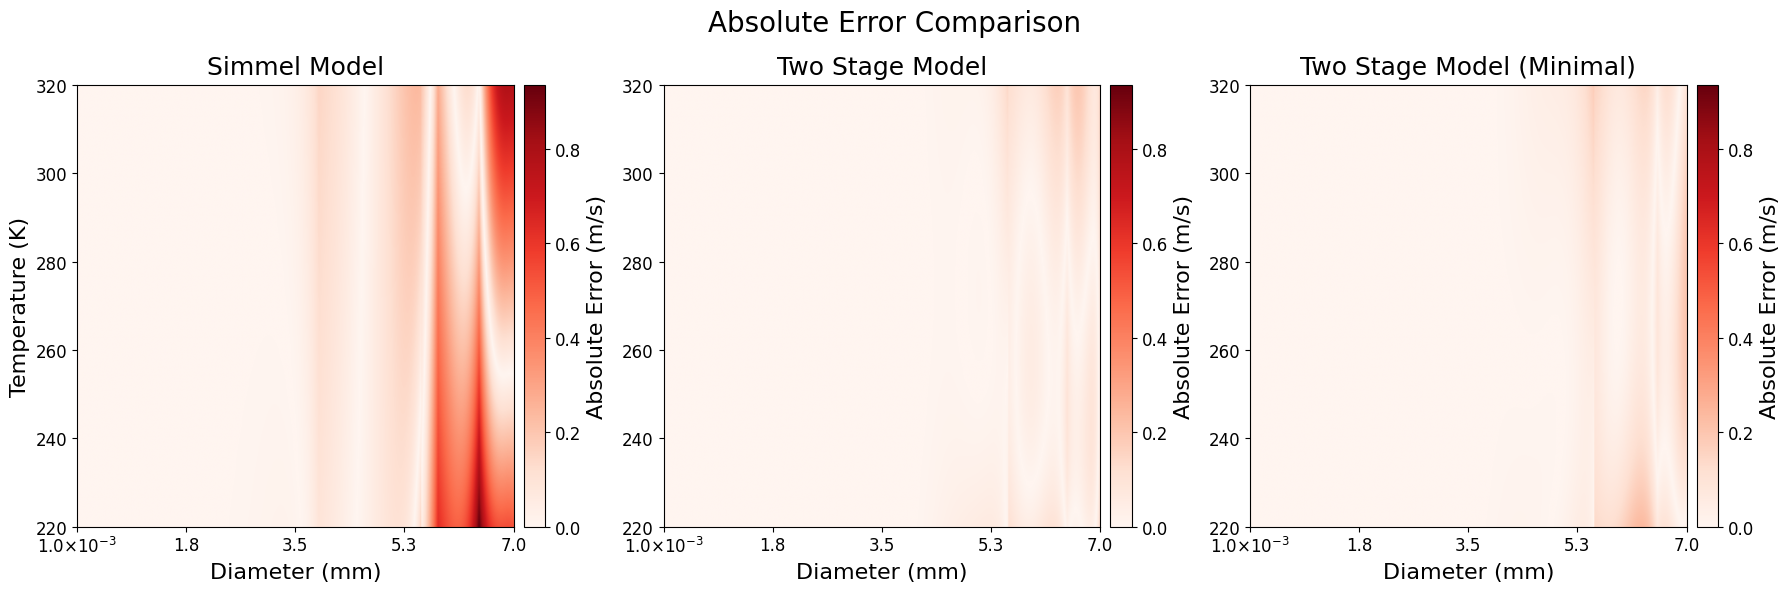

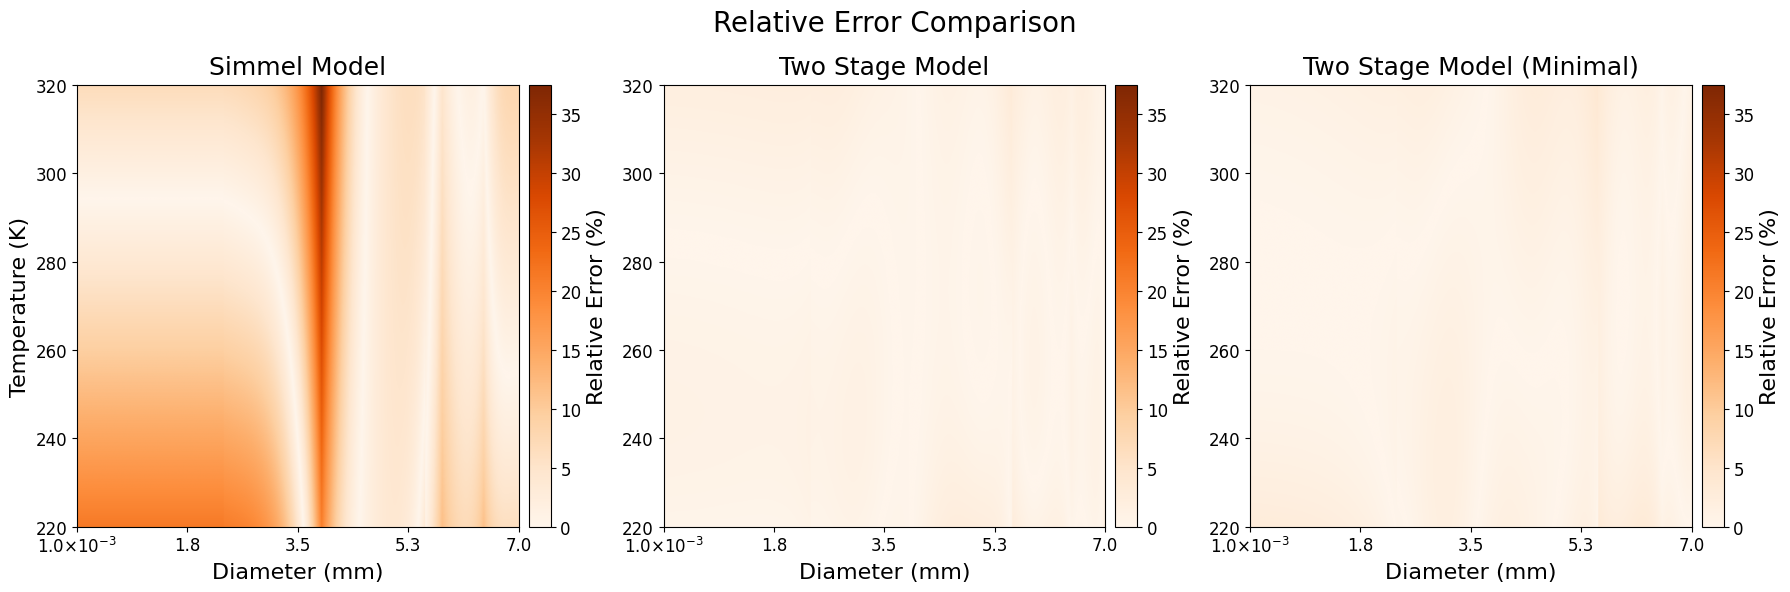

In [ ]:
def simmel_velocity_df(df):
    return simmel_velocity(df['diameter'], df['temperature'], df['pressure'])

def two_shot_model(df):
    df['vel_ref'] = df.apply(lambda row: ref_func(row['diameter']), axis=1)
    df['correction'] = df.apply(lambda row: corr_func(
        row['diameter'], 
        row['temperature'], 
        row['density'], 
        # row['dynamic_viscosity']
    ), axis=1)
    return df['vel_ref'] * df['correction']

def two_shot_model_50(df):
    df['vel_ref'] = df.apply(lambda row: min_ref_func(row['diameter']), axis=1)

    df['correction'] = df.apply(lambda row: min_corr_func(row['diameter'], row['temperature'], row['density']), axis=1)

    return df['vel_ref'] * df['correction']

model_names = ["Simmel Model","Two Stage Model", "Two Stage Model (Minimal)"]
# model_names = ["Two Stage Model", "Two Stage Model (Minimal)"]
predict_fns = [simmel_velocity_df, two_shot_model, two_shot_model_50]
# predict_fns = [two_shot_model, two_shot_model_50]

figures = plot_errors(model_names, predict_fns)

os.makedirs('./images', exist_ok=True)

for i, fig in enumerate(figures):
    plt.show()
    fig.savefig(f'../images/error_comparison_simmel_{i}.pdf', bbox_inches='tight', dpi=300)
    plt.close(fig)